In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
from math import ceil

In [2]:
df1 = pd.read_csv("/kaggle/input/bengaluru-house-prices/bengaluru_house_prices.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
df1['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [7]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(13320, 5)

In [8]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df2.shape

(13320, 5)

In [10]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df3.shape

(13246, 5)

In [12]:
df3 = df3.copy()
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [13]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [14]:
2+3

5

In [15]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [16]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [17]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4


In [18]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [19]:
(2100+2850)/2

2475.0

In [20]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [21]:
df5_stats = df5['price_per_sqft'].describe()
df5_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [22]:
df5.to_csv("bhp.csv",index=False)

In [23]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

location
Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: count, Length: 1287, dtype: int64

In [24]:
location_stats.values.sum()

13200

In [25]:
len(location_stats[location_stats>10])

240

In [26]:
len(location_stats)

1287

In [27]:
len(location_stats[location_stats<=10])

1047

In [28]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: count, Length: 1047, dtype: int64

In [29]:
len(df5.location.unique())

1287

In [30]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

241

In [31]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [32]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [33]:
df5.shape

(13200, 7)

In [34]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12456, 7)

In [35]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [36]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10242, 7)

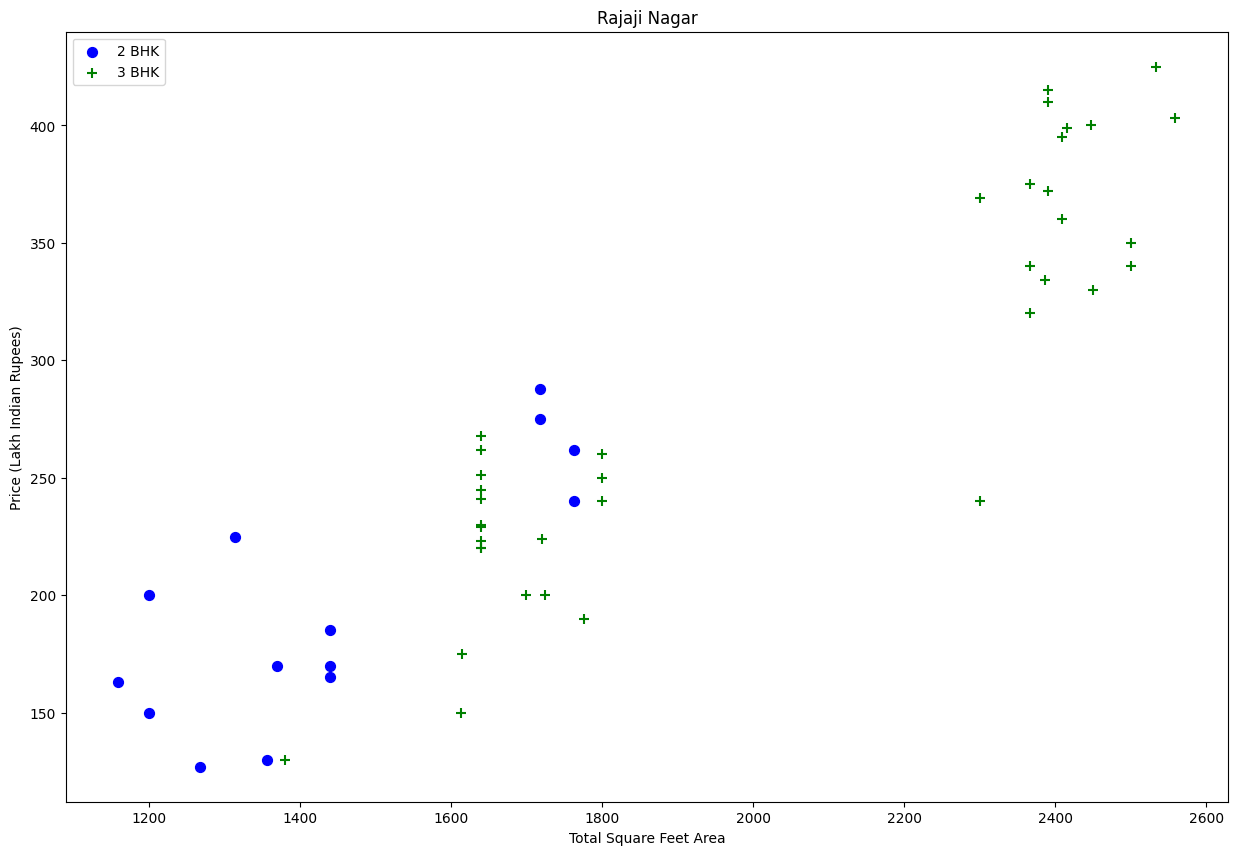

In [37]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

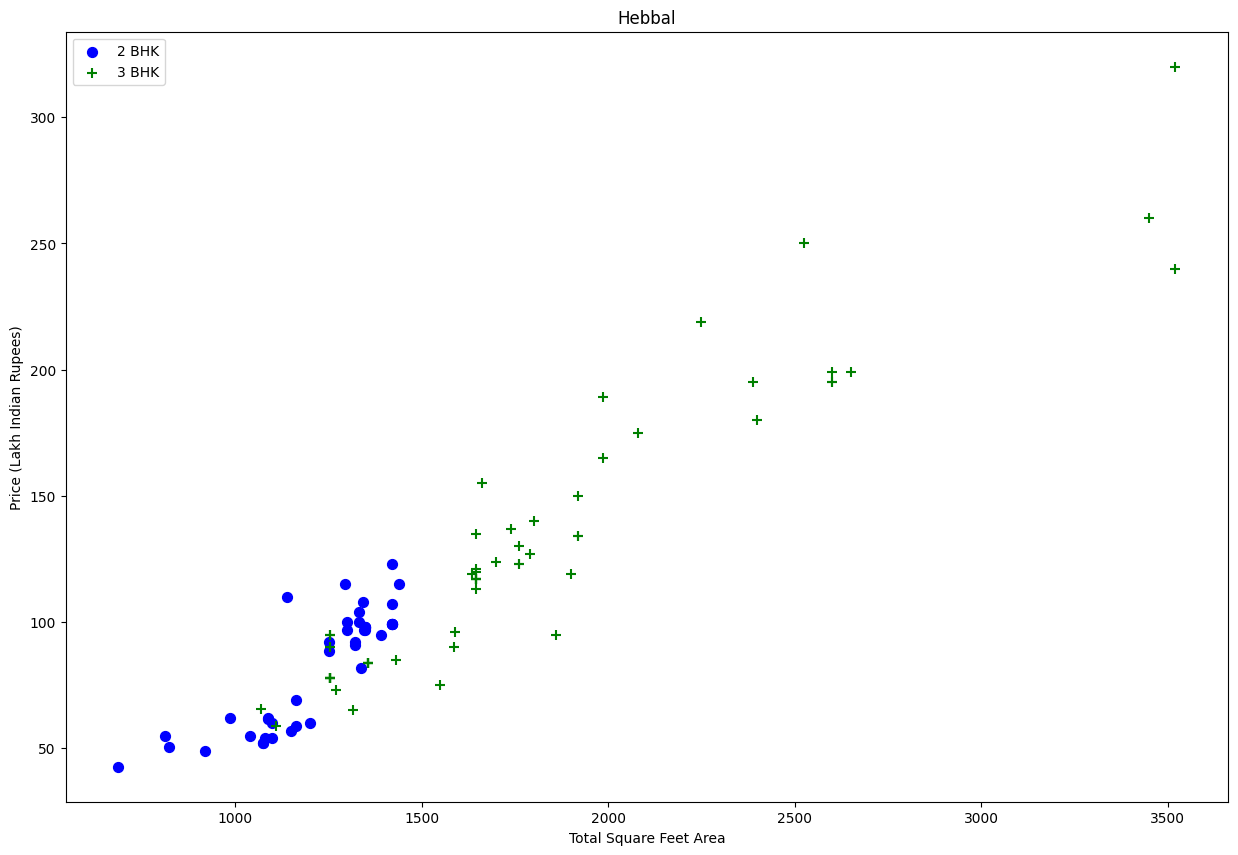

In [38]:
plot_scatter_chart(df7,"Hebbal")

In [39]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7317, 7)

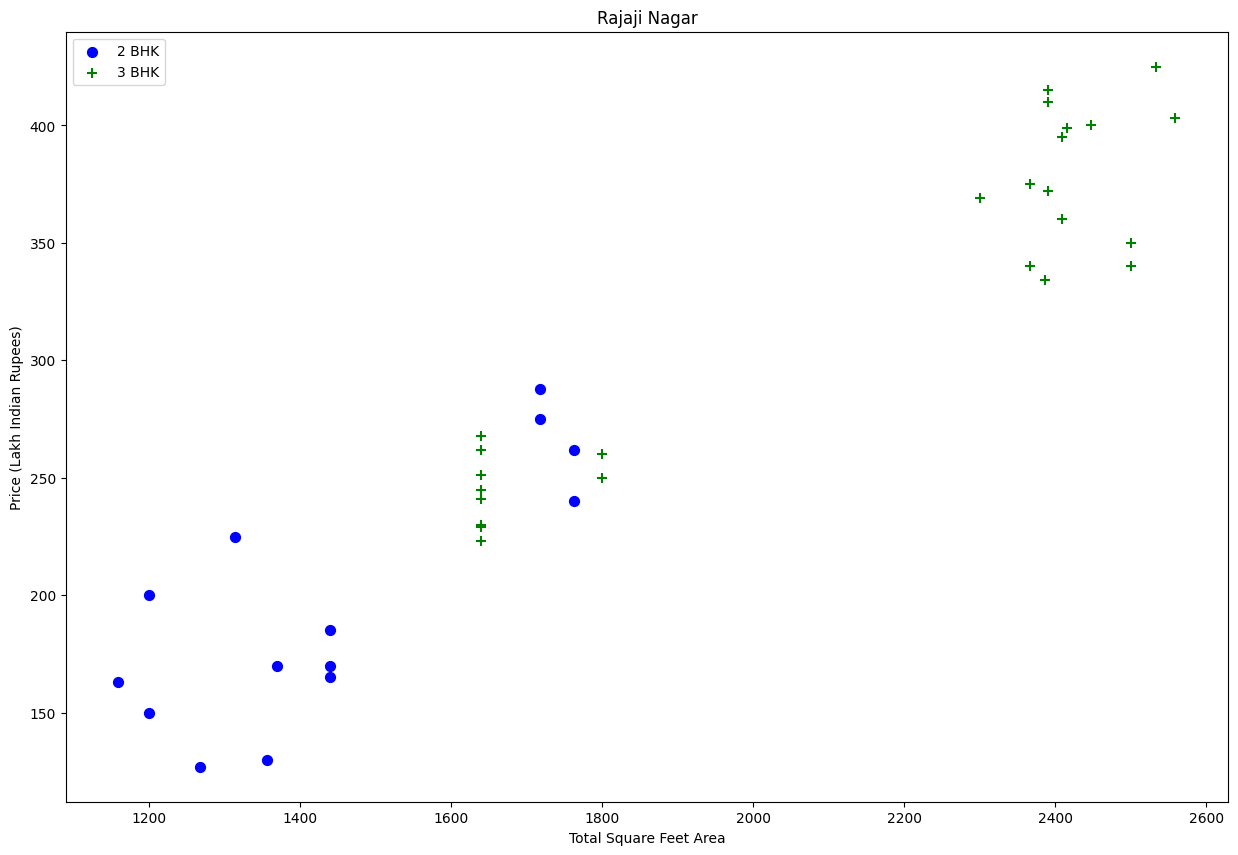

In [40]:
plot_scatter_chart(df8,"Rajaji Nagar")

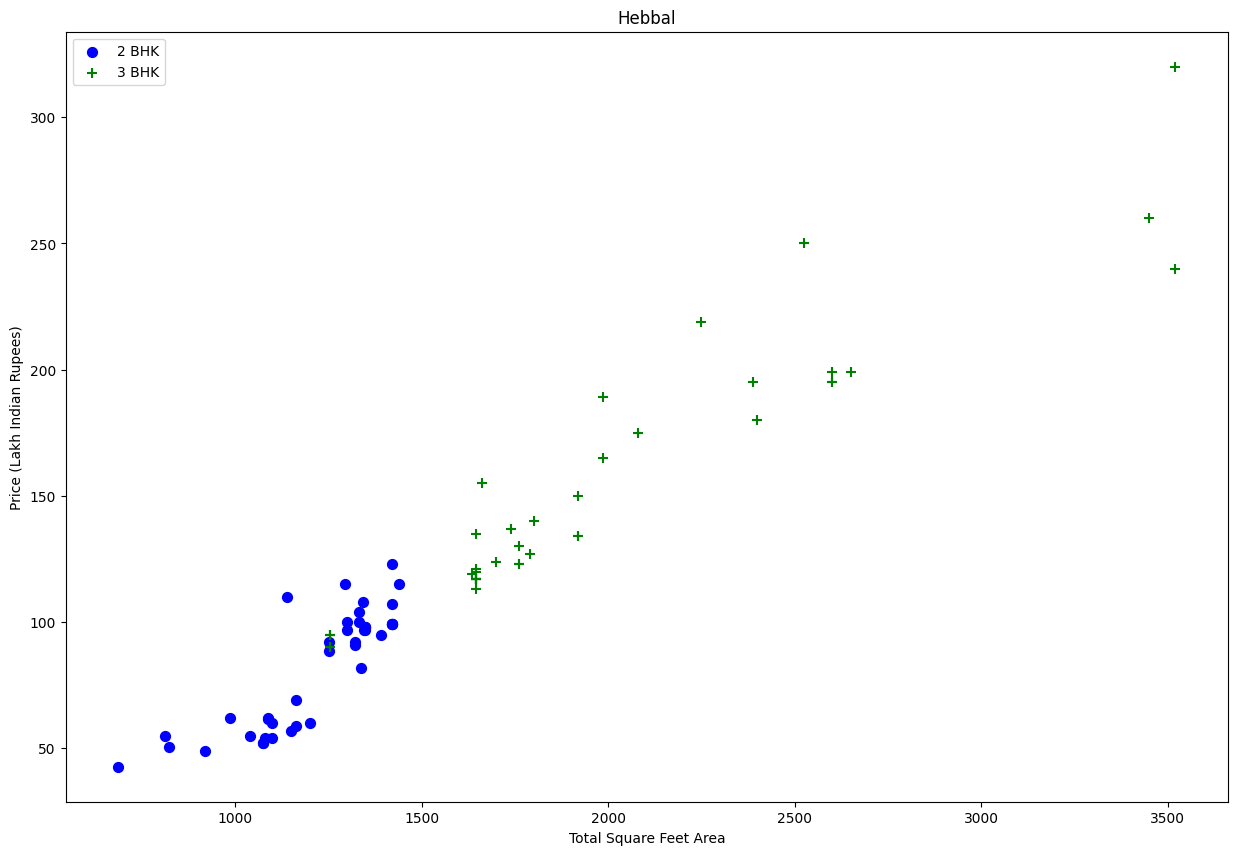

In [41]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

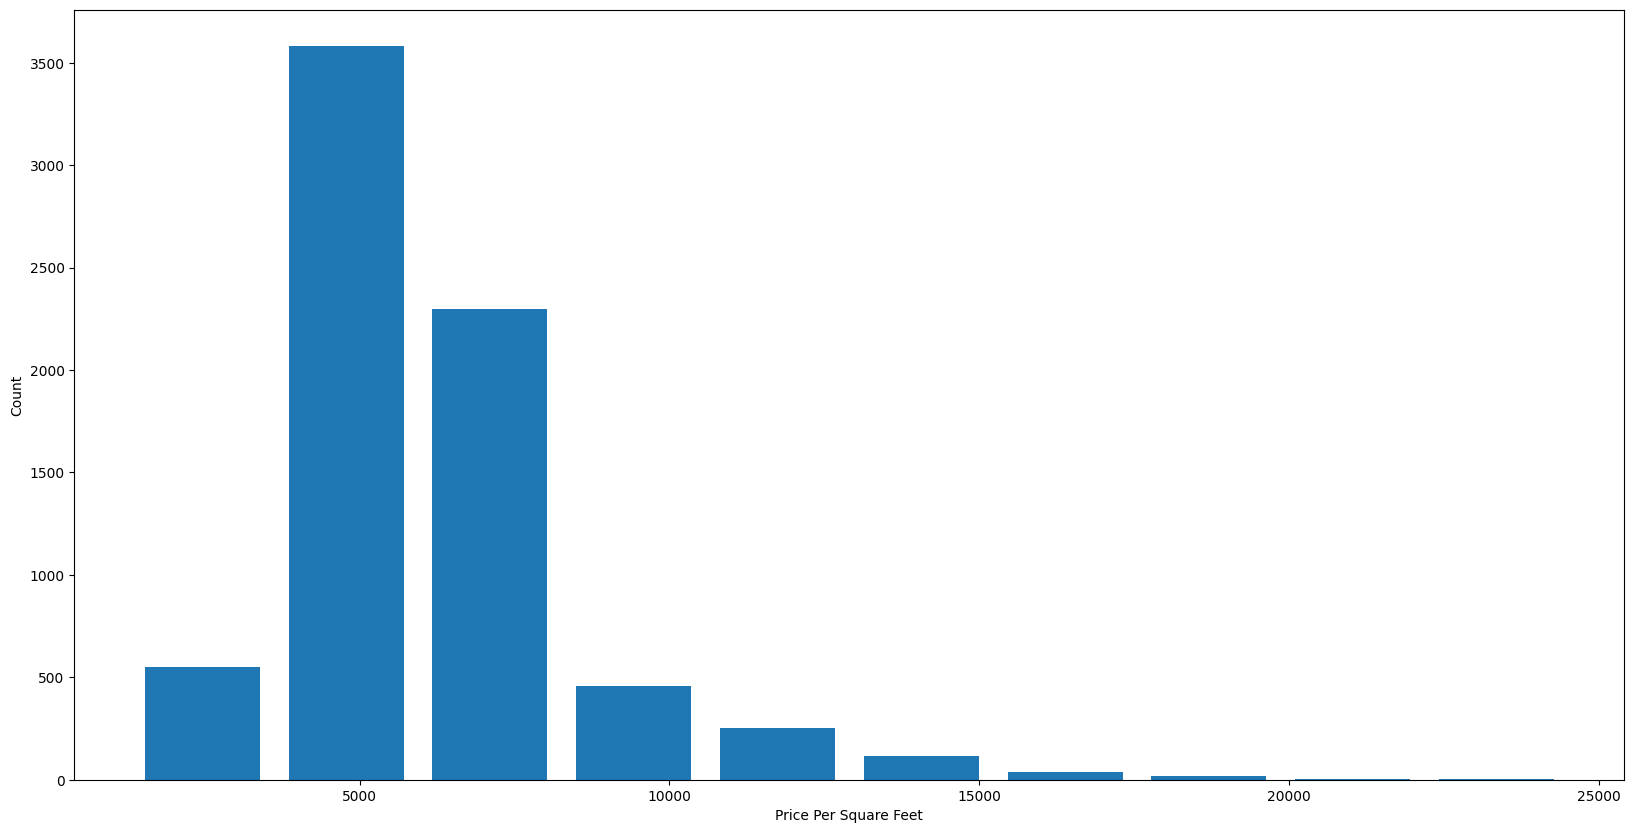

In [42]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [43]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

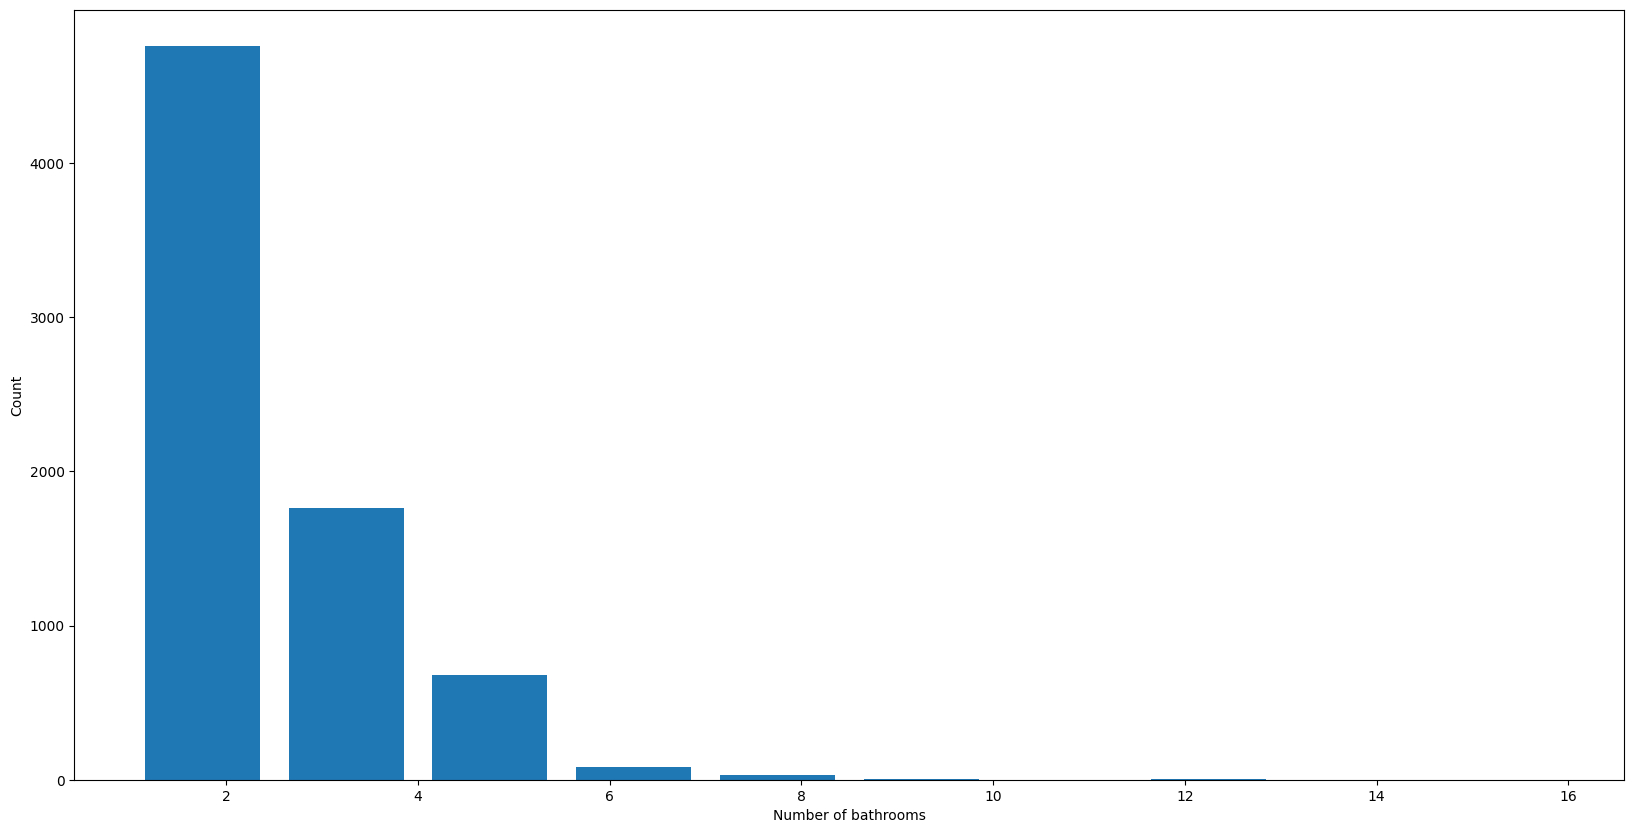

In [44]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [45]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [46]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [47]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7239, 7)

In [48]:
df9.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491


In [49]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [50]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [51]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [52]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
corr = df12.corrwith(df12['price']).sort_values()
corr

Chandapura                 -0.075136
Uttarahalli                -0.065530
Electronic City Phase II   -0.065472
Electronic City            -0.059739
Raja Rajeshwari Nagar      -0.059456
                              ...   
Cunningham Road             0.260616
bhk                         0.571255
bath                        0.601248
total_sqft                  0.841063
price                       1.000000
Length: 244, dtype: float64

In [54]:
correlation_with_target = df12.corr()['price']

threshold = 0.05
negative_corr_features = correlation_with_target[correlation_with_target < threshold].index.tolist()

df12 = df12.drop(negative_corr_features, axis=1)

In [55]:
corr = df12.corrwith(df12['price']).sort_values()
corr

Old Airport Road         0.053991
Sarakki Nagar            0.054370
Banashankari Stage II    0.057179
Hebbal                   0.059626
Hebbal Kempapura         0.059831
Hosakerehalli            0.061005
1st Block Jayanagar      0.062831
Whitefield               0.066230
Kodihalli                0.067883
Cooke Town               0.070206
HAL 2nd Stage            0.070948
Iblur Village            0.072590
Koramangala              0.083557
Benson Town              0.084723
Frazer Town              0.088062
Giri Nagar               0.108478
Indira Nagar             0.113219
Malleshwaram             0.143116
Rajaji Nagar             0.193242
Cunningham Road          0.260616
bhk                      0.571255
bath                     0.601248
total_sqft               0.841063
price                    1.000000
dtype: float64

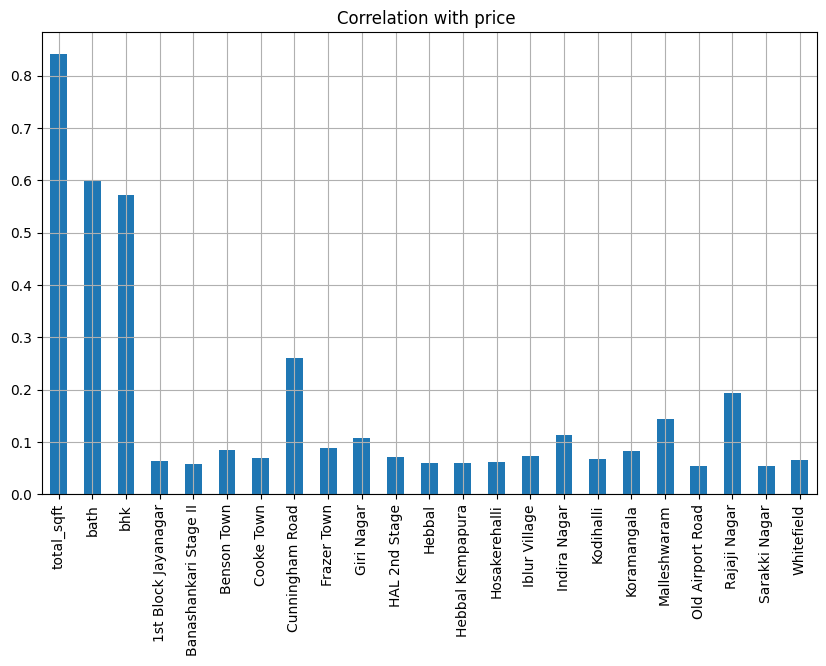

In [56]:
df12.drop('price',axis=1).corrwith(df12.price).plot(kind='bar',grid=True,figsize=(10,6),title="Correlation with price ")
plt.show()

In [57]:
df12.shape

(7239, 24)

In [58]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,Banashankari Stage II,Benson Town,Cooke Town,Cunningham Road,Frazer Town,Giri Nagar,...,Hosakerehalli,Iblur Village,Indira Nagar,Kodihalli,Koramangala,Malleshwaram,Old Airport Road,Rajaji Nagar,Sarakki Nagar,Whitefield
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [59]:
X.shape

(7239, 23)

In [60]:
y = df12.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [61]:
len(y)

7239

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [63]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_score = lr_clf.score(X_test,y_test)
print(f'Linear Regression Score: {ceil(lr_score * 100)}%')

Linear Regression Score: 81%


In [64]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
dt_score = dt_reg.score(X_test, y_test)
print(f'Decision Tree Regression Score: {ceil(dt_score * 100)}%')

Decision Tree Regression Score: 69%


In [65]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
rf_score = rf_reg.score(X_test, y_test)
print(f'Random Forest Regression Score: {ceil(rf_score * 100)}%')

Random Forest Regression Score: 75%


In [66]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, y_train)
gb_score = gb_reg.score(X_test, y_test)
print(f'Gradient Boosting Regression Score: {ceil(gb_score * 100)}%')

Gradient Boosting Regression Score: 83%


In [67]:
from sklearn.linear_model import Ridge

ridge_clf = Ridge(alpha=1.0)
ridge_clf.fit(X_train, y_train)
ridge_score = ridge_clf.score(X_test, y_test)
print(f'Ridge Regression Score: {ceil(ridge_score * 100)}%')

Ridge Regression Score: 81%


In [68]:
from sklearn.linear_model import Lasso

lasso_clf = Lasso(alpha=1.0)
lasso_clf.fit(X_train, y_train)
lasso_score = lasso_clf.score(X_test, y_test)
print(f'Lasso Regression Score: {ceil(lasso_score * 100)}%')

Lasso Regression Score: 72%


In [69]:
y_pre = gb_reg.predict(X_test)

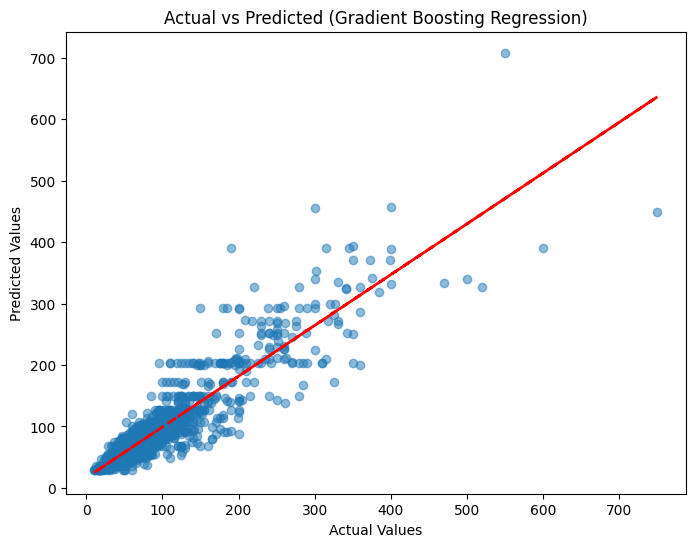

In [70]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pre, alpha=0.5)
plt.title('Actual vs Predicted (Gradient Boosting Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

fit_line = np.polyfit(y_test, y_pre, 1)
fit_fn = np.poly1d(fit_line)
plt.plot(y_test, fit_fn(y_test), color='red', linestyle='--', linewidth=2)
plt.show()

In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pre)
print(f'Mean Absolute Error: {mae:.4f}')

mse = mean_squared_error(y_test, y_pre)
print(f'Mean Squared Error: {mse:.4f}')

r2 = r2_score(y_test, y_pre)
print(f'R-squared: {r2:.4f}')

Mean Absolute Error: 18.6662
Mean Squared Error: 927.2665
R-squared: 0.8212


In [72]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.79202787, 0.80977066, 0.80500645, 0.81808933, 0.80833788])

In [73]:
import pandas as pd

def predict_price_for_new_data(gb_reg, feature_columns, new_data_point):
    try:
        new_data_point = new_data_point[feature_columns]
        predicted_price = gb_reg.predict(new_data_point)
        print(f'Predicted Price: {predicted_price[0]:.2f} Lakhs')
    except KeyError as e:
        print(f"Error: {e}. Make sure you entered values for all the required features.")

In [74]:
new_data_points = pd.DataFrame({
    'total_sqft': [1200, 1500, 1800],
    'bath': [2, 3, 2],
    'bhk': [3, 4, 3],
    '1st Block Jayanagar': [0, 0, 1],
    'Banashankari Stage II': [1, 0, 0],
    'Benson Town': [0, 1, 0],
    'Cooke Town': [1, 0, 0],
    'Cunningham Road': [0, 1, 0],
    'Frazer Town': [0, 0, 1],
    'Giri Nagar': [0, 0, 0],
    'Hebbal': [0, 0, 0],
    'Hebbal Kempapura': [0, 0, 0],
    'Hosakerehalli': [0, 0, 0],
    'Iblur Village': [0, 0, 0],
    'Indira Nagar': [0, 0, 0],
    'Kodihalli': [0, 0, 0],
    'Koramangala': [0, 0, 0],
    'Malleshwaram': [0, 0, 0],
    'Old Airport Road': [0, 0, 0],
    'Rajaji Nagar': [0, 0, 0],
    'Sarakki Nagar': [0, 0, 0],
    'Whitefield': [0, 0, 0],
    'HAL 2nd Stage': [0, 0, 0],
})

for i, new_data_point in enumerate(new_data_points.iterrows(), 1):
    new_data_point = new_data_point[1].to_frame().T[X_train.columns]
    predicted_price = gb_reg.predict(new_data_point)
    print(f'Predicted Price for Data Point {i}: {predicted_price[0]:.2f} Lakhs')


Predicted Price for Data Point 1: 132.52 Lakhs
Predicted Price for Data Point 2: 271.36 Lakhs
Predicted Price for Data Point 3: 224.22 Lakhs
